#  TP3 : Clustering et Word2Vec

### Marouane BIDOUKHACH - STIC 

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to C:\Users\Marouane
[nltk_data]     Bidoukhach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Marouane
[nltk_data]     Bidoukhach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB838_1950-01-06_01-00002.txt',
 'KB_JB838_1950-01-07_01-00013.txt',
 'KB_JB838_1950-01-08_01-00011.txt',
 'KB_JB838_1950-01-10_01-00006.txt',
 'KB_JB838_1950-01-15_01-00010.txt']

In [7]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'/ LE SOIR Une importante manifestation franco-belge Le Comité franco-belge du Commerce, de l’Industrie et de l’Agriculture qui. au cours de l’année écoulée et dans les circonstances les plus difficiles a rendu aux relations économiques entre les deux pays des services considérables, donnera le 12 janvier, à 19 h. 30, un dîner à l’occasion de l’anniversaire de son installation. Ce comité, qui fonct'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\Marouane Bidoukhach\TAC2\tac\.env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Détail de la matrice
tfidf_vectors

<1000x3506 sparse matrix of type '<class 'numpy.float64'>'
	with 703537 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

parti           0.276938
loyer           0.152177
janvier         0.148006
populaire       0.147153
propriétaire    0.143666
                  ...   
habitants       0.000000
agit            0.000000
haecht          0.000000
hainaut         0.000000
#               0.000000
Length: 3506, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.03783743])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.       , 0.0067047, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.9314339868905285

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['KB_JB838_1950-01-22_01-00014.txt',
     'KB_JB838_1950-02-15_01-00011.txt',
     'KB_JB838_1950-02-16_01-00014.txt',
     'KB_JB838_1950-02-25_01-00013.txt',
     'KB_JB838_1950-06-04_01-00016.txt',
     'KB_JB838_1950-06-11_01-00015.txt',
     'KB_JB838_1950-09-08_01-00012.txt',
     'KB_JB838_1950-09-09_01-00011.txt',
     'KB_JB838_1950-10-05_01-00012.txt',
     'KB_JB838_1950-10-15_01-00018.txt',
     'KB_JB838_1950-10-27_01-00014.txt',
     'KB_JB838_1950-11-04_01-00014.txt',
     'KB_JB838_1950-11-24_01-00013.txt',
     'KB_JB838_1950-12-28_01-00012.txt',
     'KB_JB838_1950-12-29_01-00014.txt',
     'KB_JB838_1951-01-16_01-00010.txt',
     'KB_JB838_1951-01-23_01-00011.txt',
     'KB_JB838_1951-02-24_01-00015.txt',
     'KB_JB838_1951-03-15_01-00016.txt',
     'KB_JB838_1951-03-22_01-00012.txt',
     'KB_JB838_1951-04-15_01-00019.txt',
     'KB_JB838_1951-05-23_01-00012.txt',
     'KB_JB838_1951-07-13_01-00013.txt',
     'KB_JB838_1951-09-29_01-00014.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.32580699,  0.11404402],
       [ 0.11344714, -0.30211054],
       [ 0.44352734, -0.25255146],
       [-0.23898552, -0.03761802],
       [-0.05189779, -0.10505105],
       [ 0.61297815,  0.50406069],
       [-0.2041063 , -0.03508451],
       [-0.19454706, -0.0381563 ],
       [ 0.62392888,  0.45588671],
       [ 0.15642298, -0.01433041]])

### Générer le plot

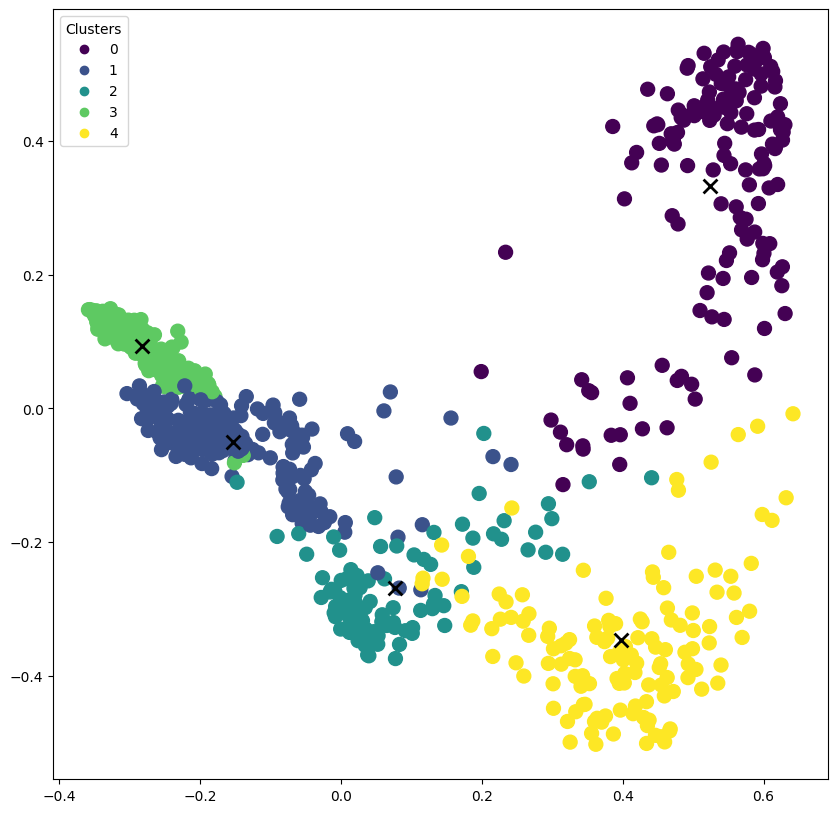

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### 3. Interprétation des résultats
Les résultats du clustering montrent que les documents sont bien regroupés en fonction de leurs thèmes :

Cluster 0 (violet) : Contient des documents sur des événements de guerre.
Cluster 1 (bleu) : Regroupe des textes politiques, souvent liés à des annonces présidentielles.
Cluster 2 (cyan) : Mélange de documents sur des thèmes économiques et politiques.
Cluster 3 (jaune) : Textes axés sur la reprise économique et la croissance.
Cluster 4 (vert) : Documents concernant les négociations de paix et la diplomatie.
Les clusters sont bien séparés, ce qui montre que le modèle a capturé les thématiques principales de manière cohérente.

### 4. Téléchargement et préparation du fichier sents.txt
Le fichier sents.txt a été téléchargé et placé dans le dossier data/. Ce fichier contient des phrases segmentées, prêtes pour l'entraînement du modèle Word2Vec.

### 5. Entraîner un modèle Word2Vec
J'ai utilisé le fichier sents.txt pour entraîner un modèle Word2Vec en utilisant le notebook s3_word_embeddings.ipynb.

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

nltk.download('punkt')

# Charger et traiter les phrases du corpus
class MySentences(object):
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8'):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = "../data/sents.txt"
sentences = MySentences(infile)

# Détection des bigrams et trigrams
bigram_phrases = Phrases(sentences)
bigram_phraser = Phraser(bigram_phrases)
trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(trigram_phrases)
corpus = list(trigram_phraser[bigram_phraser[sentences]])

# Entraîner le modèle Word2Vec
model = Word2Vec(corpus, vector_size=32, window=1, min_count=1, workers=4, epochs=5)
model.save("../data/word2vec.model")


[nltk_data] Downloading package punkt to C:\Users\Marouane
[nltk_data]     Bidoukhach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 6. Comparaison des modèles
J'ai testé plusieurs configurations.

Configuration : window = 5, min_count = 5

Cette configuration a pris environ 70 minutes pour l'entraînement sur mon système.
Elle a donné des résultats satisfaisants, capturant bien les relations contextuelles.
Cependant, le temps d'entraînement était très long, probablement à cause de la taille de la fenêtre (window = 5), qui analyse un contexte large autour de chaque mot.

### 7. Exploration du modèle
J'ai utilisé les fonctions most_similar et similarity pour analyser le modèle.

In [ ]:
# Charger le modèle Word2Vec depuis le fichier sauvegardé
model = Word2Vec.load("../data/word2vec.model")

# 1. Calculer la similarité entre plusieurs paires de mots
similarity_pairs = [
    ("guerre", "conflit"),
    ("paix", "harmonie"),
    ("président", "ministre"),
    ("économie", "croissance"),
    ("guerre", "paix")
]

print("Similarité entre les mots :")
for word1, word2 in similarity_pairs:
    if word1 in model.wv and word2 in model.wv:
        similarity_score = model.wv.similarity(word1, word2)
        print(f"  - Similarité entre '{word1}' et '{word2}': {similarity_score:.4f}")
    else:
        print(f"  - Les mots '{word1}' ou '{word2}' ne sont pas dans le vocabulaire.")

# 2. Trouver les mots les plus similaires pour trois exemples
example_words = ['guerre', 'paix', 'président']

print("\nMots les plus similaires :")
for word in example_words:
    if word in model.wv:
        most_similar_words = model.wv.most_similar(word, topn=5)
        print(f"  - Mots similaires à '{word}':")
        for similar_word, score in most_similar_words:
            print(f"    - {similar_word}: {score:.4f}")
    else:
        print(f"  - Le mot '{word}' n'est pas dans le vocabulaire.")


FileNotFoundError: [Errno 2] No such file or directory: '../data/newspapers.model'